# Census Data from Chicago

In [250]:
# download the libraries
from census import Census
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from us import states
from census.core import ACSClient

# initialize the Census API
c = Census('6315b517232d3a888d9abd180f19bfc48c6fa7c8')

In [251]:
# Patch the ACSClient to handle 'long' data type
def field_type(self, field, year):
    types = {
        'int': int,
        'float': float,
        'string': str,
        'long': int  # Add this line
    }
    return types.get(field, str)

ACSClient._field_type = field_type

In [252]:
# Fetch the list of ACS 5-year tables
tables = c.acs5.tables()

# Filter tables containing the word 'age'
age_tables = [table for table in tables if 'english' in table['description'].lower()]

# Display the filtered tables
for table in age_tables:
    print(f"Table ID: {table['name']}, Description: {table['description']}")# Example table ID to get variables
table_id = "B01001"

# Fetch variables for the table
variables = c.acs5.table(table_id)

# Display the table and its variables
print(f"Table ID: {table_id}")
print("Variables:")
for variable in variables['variables']:
    print(f"{variable}: {variables['variables'][variable]['label']}")

Table ID: B08513, Description: MEANS OF TRANSPORTATION TO WORK BY LANGUAGE SPOKEN AT HOME AND ABILITY TO SPEAK ENGLISH FOR WORKPLACE GEOGRAPHY
Table ID: B26113, Description: GROUP QUARTERS TYPE (3 TYPES) BY LANGUAGE SPOKEN AT HOME BY ABILITY TO SPEAK ENGLISH
Table ID: C16002, Description: HOUSEHOLD LANGUAGE BY HOUSEHOLD LIMITED ENGLISH SPEAKING STATUS
Table ID: B06007PR, Description: PLACE OF BIRTH BY LANGUAGE SPOKEN AT HOME AND ABILITY TO SPEAK ENGLISH IN PUERTO RICO
Table ID: B06007, Description: PLACE OF BIRTH BY LANGUAGE SPOKEN AT HOME AND ABILITY TO SPEAK ENGLISH IN THE UNITED STATES
Table ID: B16005F, Description: NATIVITY BY LANGUAGE SPOKEN AT HOME BY ABILITY TO SPEAK ENGLISH FOR THE POPULATION 5 YEARS AND OVER (SOME OTHER RACE ALONE)
Table ID: B16005G, Description: NATIVITY BY LANGUAGE SPOKEN AT HOME BY ABILITY TO SPEAK ENGLISH FOR THE POPULATION 5 YEARS AND OVER (TWO OR MORE RACES)
Table ID: B16005H, Description: NATIVITY BY LANGUAGE SPOKEN AT HOME BY ABILITY TO SPEAK ENGLISH 

AttributeError: 'ACS5Client' object has no attribute 'table'

In [256]:
# create list of demographic data
variable_list = ['B19001_001E', 
                'B15003_001E', 'B15003_017E', 'B15003_018E', 
                'B08201_001E', 'B08201_002E',
                'B23025_001E', 'B23025_002E', 'B23025_007E', 
                'B05001_001E', 'B05001_006E', 
                'B16004_001E', 'B16004_007E', 'B16004_008E', 'B16004_012E', 'B16004_013E', 'B16004_017E', 
                'B16004_018E', 'B16004_022E', 'B16004_023E', 'B16004_029E', 'B16004_030E', 'B16004_034E',
                'B16004_035E', 'B16004_039E', 'B16004_040E', 'B16004_044E', 'B16004_045E', 'B16004_051E',
                'B16004_052E', 'B16004_056E', 'B16004_057E', 'B16004_061E', 'B16004_062E', 'B16004_066E', 'B16004_067E',
                'B01001_001E', 'B01001_018E', 'B01001_019E', 'B01001_020E', 'B01001_021E',
                'B01001_022E', 'B01001_023E', 'B01001_024E', 'B01001_025E', 'B01001_042E', 'B01001_043E',
                'B01001_044E', 'B01001_045E', 'B01001_046E', 'B01001_047E', 'B01001_048E', 'B01001_049E',
                'B01001_005E', 'B01001_006E', 'B01001_007E', 'B01001_029E', 'B01001_030E', 'B01001_031E',
                'B18101_001E', 'B18101_004E', 'B18101_007E', 'B18101_010E', 'B18101_013E', 'B18101_016E', 'B18101_019E',
                'B18101_023E', 'B18101_026E', 'B18101_029E', 'B18101_032E', 'B18101_035E', 'B18101_038E',
                'B08301_001E', 'B08301_010E']

In [257]:
# download census variables for Cook County, IL
data = c.acs5.state_county_tract((variable_list), '17', '031', Census.ALL)

In [258]:
# Make DataFrame
df = pd.DataFrame(data)
df

,B19001_001E,B15003_001E,B15003_017E,B15003_018E,B08201_001E,B08201_002E,B23025_001E,B23025_002E,B23025_007E,B05001_001E,...,B18101_016E,B18101_019E,B18101_023E,B18101_026E,B18101_029E,B18101_032E,B18101_035E,B18101_038E,B08301_001E,B08301_010E
0,2411,3285,438,50,2411,1116,3910,2830,1080,4534,...,94,42,0,0,0,171,37,30,2628,929
1,2996,4931,1206,260,2996,895,5868,3840,2028,8232,...,36,21,0,0,18,232,44,0,3605,990
2,1234,2178,282,150,1234,487,2551,1632,919,3124,...,14,21,0,0,9,130,64,47,1441,711
3,2995,5092,808,297,2995,1108,5572,3380,2192,6085,...,45,23,0,0,28,160,13,138,3206,771
4,2034,2510,118,31,2034,989,4496,2378,2118,4587,...,0,15,0,0,16,53,0,31,2244,773
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1327,809,1768,496,19,809,165,2133,1473,660,2490,...,37,8,0,0,36,36,8,48,1008,189
1328,653,1030,174,69,653,189,1279,752,527,1573,...,5,15,0,0,0,88,17,40,567,113
1329,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1330,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [259]:
# Rename the columns for better readability
df = df.rename(columns={
    'B19001_001E' : 'income',
    'B15003_001E' : 'total_pop_education',
    'B15003_017E' :	'diploma',
    'B15003_018E' : 'ged',
    'B08201_001E' : 'total_vehicle',
    'B08201_002E' :	'no_vehicle',
    'B23025_001E' : 'total_employment',
    'B23025_002E' :	'employed',
    'B23025_007E' : 'unemployed',
    'B05001_001E' : 'total_citizen',
    'B05001_006E' : 'not_us_citizen',
    'B16004_001E' : 'total_language',	
    'B16004_007E' : '5_to_17_spanish_not_well',
    'B16004_008E' : '5_to_17_spanish_not_all',
    'B16004_012E' : '5_to_17_europe_not_well',
    'B16004_013E' : '5_to_17_europe_not_all',
    'B16004_017E' : '5_to_17_asian_not_well',
    'B16004_018E' : '5_to_17_asian_not_all',
    'B16004_022E' : '5_to_17_other_not_well',
    'B16004_023E' : '5_to_17_other_not_all',
    'B16004_029E' : '18_to_64_spanish_not_well',
    'B16004_030E' : '18_to_64_spanish_not_all',
    'B16004_034E' : '18_to_64_europe_not_well',
    'B16004_035E' : '18_to_64_europe_not_all',
    'B16004_039E' : '18_to_64_asian_not_well',
    'B16004_040E' : '18_to_64_asian_not_all',
    'B16004_044E' : '18_to_64_other_not_well',
    'B16004_045E' : '18_to_64_other_not_all',
    'B16004_051E' : 'over_65_spanish_not_well',
    'B16004_052E' : 'over_65_spanish_not_all',
    'B16004_056E' : 'over_65_europe_not_well',
    'B16004_057E' : 'over_65_europe_not_all',
    'B16004_061E' : 'over_65_asian_not_well',
    'B16004_062E' : 'over_65_asian_not_all',
    'B16004_066E' : 'over_65_other_not_well',
    'B16004_067E' : 'over_65_other_not_all',
    'B01001_001E' : 'total_age',
    'B01001_018E' :	'male_60_to_61',
    'B01001_019E' :	'male_62_to_64',
    'B01001_020E' :	'male_65_to_66',
    'B01001_021E' :	'male_67_to_69',
    'B01001_022E' :	'male_70_to_74',
    'B01001_023E' :	'male_75_to_79',
    'B01001_024E' :	'male_80_to_84',
    'B01001_025E' :	'male_over_85',
    'B01001_042E' :	'female_60_to_61',	
    'B01001_043E' :	'female_62_to_64',
    'B01001_044E' :	'female_65_to_66',
    'B01001_045E' :	'female_67_to_69',
    'B01001_046E' :	'female_70_to_74',	
    'B01001_047E' : 'female_75_to_79',	
    'B01001_048E' :	'female_80_to_84',	
    'B01001_049E' :	'female_over_85',
    'B01001_005E' :	'male_10_to_14',
    'B01001_006E' :	'male_15_to_17',
    'B01001_007E' :	'male_18_to_19',
    'B01001_029E' :	'female_10_to_14',
    'B01001_030E' :	'female_15_to_17',
    'B01001_031E' : 'female_18_to_19',
    'B18101_001E' : 'total_disability',
    'B18101_004E' : 'male_under_5_with_disability',
    'B18101_007E' :	'male_5_to_17_with_disability',
    'B18101_010E' : 'male_18_to_34_with_disability',	
    'B18101_013E' : 'male_35_to_64_with_disability',
    'B18101_016E' : 'male_65_to_74_with_disability',
    'B18101_019E' :	'male_over_75_with_disability',
    'B18101_023E' :	'female_under_5_with_disability',
    'B18101_026E' :	'female_5_to_17_with_disability',
    'B18101_029E' :	'female_18_to_34_with_disability',
    'B18101_032E' :	'female_35_to_64_with_disability',
    'B18101_035E' :	'female_65_to_74_with_disability',
    'B18101_038E' :	'female_over_74_with_disability',
    'B08301_001E' : 'total_transit',
    'B08301_010E' :	'public_transit'
    })

In [260]:
# Check if any column has missing values
# Count missing values in each column
missing_count = df.isna().sum()
print(missing_count)

income                             0
total_pop_education                0
diploma                            0
ged                                0
total_vehicle                      0
                                  ..
female_35_to_64_with_disability    0
female_65_to_74_with_disability    0
female_over_74_with_disability     0
total_transit                      0
public_transit                     0
Length: 78, dtype: int64


In [261]:
# List of columns to convert to numeric
columns_to_convert = ['income', 'total_pop_education', 'diploma', 'ged', 'total_vehicle',
       'no_vehicle', 'total_employment', 'employed', 'unemployed',
       'total_citizen', 'not_us_citizen', 'total_language',
       '5_to_17_spanish_not_well', '5_to_17_spanish_not_all',
       '5_to_17_europe_not_well', '5_to_17_europe_not_all',
       '5_to_17_asian_not_well', '5_to_17_asian_not_all',
       '5_to_17_other_not_well', '5_to_17_other_not_all',
       '18_to_64_spanish_not_well', '18_to_64_spanish_not_all',
       '18_to_64_europe_not_well', '18_to_64_europe_not_all',
       '18_to_64_asian_not_well', '18_to_64_asian_not_all',
       '18_to_64_other_not_well', '18_to_64_other_not_all',
       'over_65_spanish_not_well', 'over_65_spanish_not_all',
       'over_65_europe_not_well', 'over_65_europe_not_all',
       'over_65_asian_not_well', 'over_65_asian_not_all',
       'over_65_other_not_well', 'over_65_other_not_all', 'total_age',
       'male_60_to_61', 'male_62_to_64', 'male_65_to_66', 'male_67_to_69',
       'male_70_to_74', 'male_75_to_79', 'male_80_to_84', 'male_over_85',
       'female_60_to_61', 'female_62_to_64', 'female_65_to_66',
       'female_67_to_69', 'female_70_to_74',
       'female_75_to_79', 'female_80_to_84', 'female_over_85', 'male_10_to_14',
       'male_15_to_17', 'male_18_to_19', 'female_10_to_14', 'female_15_to_17',
       'female_18_to_19', 'total_disability', 'male_under_5_with_disability',
       'male_5_to_17_with_disability', 'male_18_to_34_with_disability',
       'male_35_to_64_with_disability', 'male_65_to_74_with_disability',
       'male_over_75_with_disability', 'female_under_5_with_disability',
       'female_5_to_17_with_disability', 'female_18_to_34_with_disability',
       'female_35_to_64_with_disability', 'female_65_to_74_with_disability',
       'female_over_74_with_disability', 'total_transit', 'public_transit']

# Convert specified columns to numeric
df[columns_to_convert] = df[columns_to_convert].apply(lambda col: pd.to_numeric(col, errors='coerce'))

print("\nDataFrame after converting specified columns to numeric:")
print(df)


DataFrame after converting specified columns to numeric:
      income  total_pop_education  diploma  ged  total_vehicle  no_vehicle  \
0       2411                 3285      438   50           2411        1116   
1       2996                 4931     1206  260           2996         895   
2       1234                 2178      282  150           1234         487   
3       2995                 5092      808  297           2995        1108   
4       2034                 2510      118   31           2034         989   
...      ...                  ...      ...  ...            ...         ...   
1327     809                 1768      496   19            809         165   
1328     653                 1030      174   69            653         189   
1329       0                    0        0    0              0           0   
1330       0                    0        0    0              0           0   
1331       0                    0        0    0              0           0   

     

In [262]:
# Calculate the percentage of the population that completed high school
df['percent_higher_ed'] = ((df['diploma'] + df['ged']) / df['total_pop_education'])

In [263]:
# Calculate the percentage of the population that has no access to a car
df['percent_vehicle_access'] = (df['no_vehicle'] / df['total_vehicle'])

In [264]:
# Calculate the percentage of the population that is employed
df['percent_employed'] = (df['employed'] / df['total_employment'])

In [265]:
# Calculate the percentage of the population that are not US citizens
df['percent_citizen'] = (df['not_us_citizen'] / df['total_citizen'])

In [266]:
# Calculate the percentage of the population that speak english not well or not at all
df['percent_english_speaking'] = ((df['5_to_17_spanish_not_well'] + df['5_to_17_spanish_not_all'] + df['5_to_17_europe_not_well'] +
                                df['5_to_17_europe_not_all'] + df['5_to_17_asian_not_well'] + df['5_to_17_asian_not_all'] +
                                df['5_to_17_other_not_well'] + df['5_to_17_other_not_all'] + df['18_to_64_spanish_not_well'] +
                                df['18_to_64_spanish_not_all'] + df['18_to_64_europe_not_well'] + df['18_to_64_europe_not_all'] +
                                df['18_to_64_asian_not_well'] + df['18_to_64_asian_not_all'] + df['18_to_64_other_not_well'] +
                                df['18_to_64_other_not_all'] + df['over_65_spanish_not_well'] + df['over_65_spanish_not_all'] +
                                df['over_65_europe_not_well'] + df['over_65_europe_not_all'] + df['over_65_asian_not_well'] +
                                df['over_65_asian_not_all'] + df['over_65_other_not_well'] + df['over_65_other_not_all'])
                                  / df['total_language'])

In [267]:
# Calculate the percentage of the population that is older than 60
df['percent_older_60'] = ((df['male_60_to_61'] + df['male_62_to_64'] + df['male_65_to_66'] +
                        df['male_67_to_69'] + df['male_70_to_74'] + df['male_75_to_79'] +
                        df['male_80_to_84'] + df['male_over_85'] +
                        df['female_60_to_61'] + df['female_62_to_64'] + df['female_65_to_66'] +
                        df['female_67_to_69'] + df['female_70_to_74'] + df['female_75_to_79'] +
                        df['female_80_to_84'] + df['female_over_85'])
                        / df['total_age'])

In [268]:
# Calculate the percentage of the population that between 10 and 19
df['percent_younger_19'] = ((df['male_10_to_14'] + df['male_15_to_17'] + df['male_18_to_19'] +
                        df['female_10_to_14'] + df['female_15_to_17'] + df['female_18_to_19'])
                        / df['total_age'])

In [269]:
# Calculate the percentage of the population that have a disability
df['percent_disability'] = ((df['male_under_5_with_disability'] + df['male_5_to_17_with_disability'] + df['male_18_to_34_with_disability'] +
                            df['male_35_to_64_with_disability'] + df['male_65_to_74_with_disability'] + 
                            df['male_over_75_with_disability'] + df['female_under_5_with_disability'] + df['female_5_to_17_with_disability'] +
                            df['female_18_to_34_with_disability'] + df['female_35_to_64_with_disability'] + 
                            df['female_65_to_74_with_disability'] + df['female_over_74_with_disability'])
                            / df['total_disability'])

In [270]:
# Calculate the percentage of the population that use public transit to get to work
df['percent_transit'] = (df['public_transit'] / df['total_transit'])
print(df)

      income  total_pop_education  diploma  ged  total_vehicle  no_vehicle  \
0       2411                 3285      438   50           2411        1116   
1       2996                 4931     1206  260           2996         895   
2       1234                 2178      282  150           1234         487   
3       2995                 5092      808  297           2995        1108   
4       2034                 2510      118   31           2034         989   
...      ...                  ...      ...  ...            ...         ...   
1327     809                 1768      496   19            809         165   
1328     653                 1030      174   69            653         189   
1329       0                    0        0    0              0           0   
1330       0                    0        0    0              0           0   
1331       0                    0        0    0              0           0   

      total_employment  employed  unemployed  total_citizen  ..

In [273]:
print("Original DataFrame:")
print(df)
print("\nChecking for NaN values:")
print(df.isna().sum())
df = df.dropna()
df

Original DataFrame:
      income  total_pop_education  diploma  ged  total_vehicle  no_vehicle  \
0       2411                 3285      438   50           2411        1116   
1       2996                 4931     1206  260           2996         895   
2       1234                 2178      282  150           1234         487   
3       2995                 5092      808  297           2995        1108   
4       2034                 2510      118   31           2034         989   
...      ...                  ...      ...  ...            ...         ...   
1324    1040                 1772       78   33           1040         200   
1325     704                 1125      315   66            704         230   
1326    2073                 2634      308   40           2073         481   
1327     809                 1768      496   19            809         165   
1328     653                 1030      174   69            653         189   

      total_employment  employed  unemploye

,income,total_pop_education,diploma,ged,total_vehicle,no_vehicle,total_employment,employed,unemployed,total_citizen,...,public_transit,percent_higher_ed,percent_vehicle_access,percent_employed,percent_citizen,percent_english_speaking,percent_older_60,percent_younger_19,percent_disability,percent_transit
0,2411,3285,438,50,2411,1116,3910,2830,1080,4534,...,929,0.148554,0.462878,0.723785,0.128805,0.014149,0.159682,0.067049,0.140797,0.353501
1,2996,4931,1206,260,2996,895,5868,3840,2028,8232,...,990,0.297303,0.298732,0.654397,0.204568,0.121892,0.093294,0.144679,0.083465,0.274619
2,1234,2178,282,150,1234,487,2551,1632,919,3124,...,711,0.198347,0.394652,0.639749,0.230794,0.109267,0.193982,0.123880,0.150864,0.493407
3,2995,5092,808,297,2995,1108,5572,3380,2192,6085,...,771,0.217007,0.369950,0.606604,0.115859,0.052722,0.296467,0.020871,0.090384,0.240487
4,2034,2510,118,31,2034,989,4496,2378,2118,4587,...,773,0.059363,0.486234,0.528915,0.071288,0.022573,0.083933,0.238936,0.114018,0.344474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1324,1040,1772,78,33,1040,200,1832,1439,393,2482,...,286,0.062641,0.192308,0.785480,0.065270,0.048903,0.122885,0.115230,0.072522,0.203414
1325,704,1125,315,66,704,230,1261,737,524,1425,...,99,0.338667,0.326705,0.584457,0.040702,0.067090,0.321404,0.160702,0.203509,0.170103
1326,2073,2634,308,40,2073,481,2824,1815,1009,3288,...,417,0.132118,0.232031,0.642705,0.015207,0.000000,0.288929,0.079684,0.219282,0.238695
1327,809,1768,496,19,809,165,2133,1473,660,2490,...,189,0.291290,0.203956,0.690577,0.022490,0.014382,0.152209,0.084739,0.121370,0.187500


In [274]:
# List of columns to convert to numeric
columns_to_convert = ['percent_higher_ed', 'percent_vehicle_access', 'percent_employed',
       'percent_citizen', 'percent_english_speaking', 'percent_older_60',
       'percent_younger_19', 'percent_disability', 'percent_transit']

# Convert specified columns to numeric
df[columns_to_convert] = df[columns_to_convert].apply(lambda col: pd.to_numeric(col, errors='coerce'))

print("\nDataFrame after converting specified columns to numeric:")
print(df)


DataFrame after converting specified columns to numeric:
      income  total_pop_education  diploma  ged  total_vehicle  no_vehicle  \
0       2411                 3285      438   50           2411        1116   
1       2996                 4931     1206  260           2996         895   
2       1234                 2178      282  150           1234         487   
3       2995                 5092      808  297           2995        1108   
4       2034                 2510      118   31           2034         989   
...      ...                  ...      ...  ...            ...         ...   
1324    1040                 1772       78   33           1040         200   
1325     704                 1125      315   66            704         230   
1326    2073                 2634      308   40           2073         481   
1327     809                 1768      496   19            809         165   
1328     653                 1030      174   69            653         189   

     

In [ ]:
# 10 VARIABLES
                 
# household income:
            # B19001_001E	Estimate!!Total:	HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2021 INFLATION-ADJUSTED DOLLARS)
# education level: B15001_001E
            # B15003_001E	Estimate!!Total:	EDUCATIONAL ATTAINMENT FOR THE POPULATION 25 YEARS AND OVER
            # B15003_017E	Estimate!!Total:!!Regular high school diploma	EDUCATIONAL ATTAINMENT FOR THE POPULATION 25 YEARS AND OVER
            # B15003_018E	Estimate!!Total:!!GED or alternative credential	EDUCATIONAL ATTAINMENT FOR THE POPULATION 25 YEARS AND OVER
# vehicle ownership:
            # B08201_001E	Estimate!!Total:	HOUSEHOLD SIZE BY VEHICLES AVAILABLE
            # B08201_002E	Estimate!!Total:!!No vehicle available	HOUSEHOLD SIZE BY VEHICLES AVAILABLE
# unemployment: 
            # B23025_001E	Estimate!!Total:	EMPLOYMENT STATUS FOR THE POPULATION 16 YEARS AND OVER
            # B23025_002E	Estimate!!Total:!!In labor force:
            # B23025_007E	Estimate!!Total:!!Not in labor force	EMPLOYMENT STATUS FOR THE POPULATION 16 YEARS AND OVER
# citizenship status: 
            # B05001_001E	Estimate!!Total:
            # B05001_006E	Estimate!!Total:!!Not a U.S. citizen	NATIVITY AND CITIZENSHIP STATUS IN THE UNITED STATES
# english-speaking proficiency
            # B16004_001E	Estimate!!Total:	AGE BY LANGUAGE SPOKEN AT HOME BY ABILITY TO SPEAK ENGLISH FOR THE POPULATION 5 YEARS AND OVER
            # B16004_007E	Estimate!!Total:!!5 to 17 years:!!Speak Spanish:!!Speak English "not well"	AGE BY LANGUAGE SPOKEN AT HOME BY ABILITY TO SPEAK ENGLISH FOR THE POPULATION 5 YEARS AND OVER
            # B16004_008E	Estimate!!Total:!!5 to 17 years:!!Speak Spanish:!!Speak English "not at all"	AGE BY LANGUAGE SPOKEN AT HOME BY ABILITY TO SPEAK ENGLISH FOR THE POPULATION 5 YEARS AND OVER
            # B16004_012E	Estimate!!Total:!!5 to 17 years:!!Speak other Indo-European languages:!!Speak English "not well"	AGE BY LANGUAGE SPOKEN AT HOME BY ABILITY TO SPEAK ENGLISH FOR THE POPULATION 5 YEARS AND OVER
            # B16004_013E	Estimate!!Total:!!5 to 17 years:!!Speak other Indo-European languages:!!Speak English "not at all"	AGE BY LANGUAGE SPOKEN AT HOME BY ABILITY TO SPEAK ENGLISH FOR THE POPULATION 5 YEARS AND OVER
            # B16004_017E	Estimate!!Total:!!5 to 17 years:!!Speak Asian and Pacific Island languages:!!Speak English "not well"	AGE BY LANGUAGE SPOKEN AT HOME BY ABILITY TO SPEAK ENGLISH FOR THE POPULATION 5 YEARS AND OVER
            # B16004_018E	Estimate!!Total:!!5 to 17 years:!!Speak Asian and Pacific Island languages:!!Speak English "not at all"	AGE BY LANGUAGE SPOKEN AT HOME BY ABILITY TO SPEAK ENGLISH FOR THE POPULATION 5 YEARS AND OVER
            # B16004_022E	Estimate!!Total:!!5 to 17 years:!!Speak other languages:!!Speak English "not well"	AGE BY LANGUAGE SPOKEN AT HOME BY ABILITY TO SPEAK ENGLISH FOR THE POPULATION 5 YEARS AND OVER
            # B16004_023E	Estimate!!Total:!!5 to 17 years:!!Speak other languages:!!Speak English "not at all"	AGE BY LANGUAGE SPOKEN AT HOME BY ABILITY TO SPEAK ENGLISH FOR THE POPULATION 5 YEARS AND OVER
            # B16004_029E	Estimate!!Total:!!18 to 64 years:!!Speak Spanish:!!Speak English "not well"	AGE BY LANGUAGE SPOKEN AT HOME BY ABILITY TO SPEAK ENGLISH FOR THE POPULATION 5 YEARS AND OVER
            # B16004_030E	Estimate!!Total:!!18 to 64 years:!!Speak Spanish:!!Speak English "not at all"	AGE BY LANGUAGE SPOKEN AT HOME BY ABILITY TO SPEAK ENGLISH FOR THE POPULATION 5 YEARS AND OVER
            # B16004_034E	Estimate!!Total:!!18 to 64 years:!!Speak other Indo-European languages:!!Speak English "not well"	AGE BY LANGUAGE SPOKEN AT HOME BY ABILITY TO SPEAK ENGLISH FOR THE POPULATION 5 YEARS AND OVER	
            # B16004_035E	Estimate!!Total:!!18 to 64 years:!!Speak other Indo-European languages:!!Speak English "not at all"	AGE BY LANGUAGE SPOKEN AT HOME BY ABILITY TO SPEAK ENGLISH FOR THE POPULATION 5 YEARS AND OVER
            # B16004_039E	Estimate!!Total:!!18 to 64 years:!!Speak Asian and Pacific Island languages:!!Speak English "not well"	AGE BY LANGUAGE SPOKEN AT HOME BY ABILITY TO SPEAK ENGLISH FOR THE POPULATION 5 YEARS AND OVER	
            # B16004_040E	Estimate!!Total:!!18 to 64 years:!!Speak Asian and Pacific Island languages:!!Speak English "not at all"	AGE BY LANGUAGE SPOKEN AT HOME BY ABILITY TO SPEAK ENGLISH FOR THE POPULATION 5 YEARS AND OVER
            # B16004_044E	Estimate!!Total:!!18 to 64 years:!!Speak other languages:!!Speak English "not well"	AGE BY LANGUAGE SPOKEN AT HOME BY ABILITY TO SPEAK ENGLISH FOR THE POPULATION 5 YEARS AND OVER
            # B16004_045E	Estimate!!Total:!!18 to 64 years:!!Speak other languages:!!Speak English "not at all"	AGE BY LANGUAGE SPOKEN AT HOME BY ABILITY TO SPEAK ENGLISH FOR THE POPULATION 5 YEARS AND OVER
            # B16004_051E	Estimate!!Total:!!65 years and over:!!Speak Spanish:!!Speak English "not well"	AGE BY LANGUAGE SPOKEN AT HOME BY ABILITY TO SPEAK ENGLISH FOR THE POPULATION 5 YEARS AND OVER
            # B16004_052E	Estimate!!Total:!!65 years and over:!!Speak Spanish:!!Speak English "not at all"	AGE BY LANGUAGE SPOKEN AT HOME BY ABILITY TO SPEAK ENGLISH FOR THE POPULATION 5 YEARS AND OVER
            # B16004_056E	Estimate!!Total:!!65 years and over:!!Speak other Indo-European languages:!!Speak English "not well"	AGE BY LANGUAGE SPOKEN AT HOME BY ABILITY TO SPEAK ENGLISH FOR THE POPULATION 5 YEARS AND OVER
            # B16004_057E	Estimate!!Total:!!65 years and over:!!Speak other Indo-European languages:!!Speak English "not at all"	AGE BY LANGUAGE SPOKEN AT HOME BY ABILITY TO SPEAK ENGLISH FOR THE POPULATION 5 YEARS AND OVER
            # B16004_061E	Estimate!!Total:!!65 years and over:!!Speak Asian and Pacific Island languages:!!Speak English "not well"	AGE BY LANGUAGE SPOKEN AT HOME BY ABILITY TO SPEAK ENGLISH FOR THE POPULATION 5 YEARS AND OVER
            # B16004_062E	Estimate!!Total:!!65 years and over:!!Speak Asian and Pacific Island languages:!!Speak English "not at all"	AGE BY LANGUAGE SPOKEN AT HOME BY ABILITY TO SPEAK ENGLISH FOR THE POPULATION 5 YEARS AND OVER
            # B16004_066E	Estimate!!Total:!!65 years and over:!!Speak other languages:!!Speak English "not well"	AGE BY LANGUAGE SPOKEN AT HOME BY ABILITY TO SPEAK ENGLISH FOR THE POPULATION 5 YEARS AND OVER
            # B16004_067E	Estimate!!Total:!!65 years and over:!!Speak other languages:!!Speak English "not at all"	AGE BY LANGUAGE SPOKEN AT HOME BY ABILITY TO SPEAK ENGLISH FOR THE POPULATION 5 YEARS AND OVER

# seniors older than 60
            # B01001_001E	Estimate!!Total:	SEX BY AGE
            # B01001_018E	Estimate!!Total:!!Male:!!60 and 61 years
            # B01001_019E	Estimate!!Total:!!Male:!!62 to 64 years
            # B01001_020E	Estimate!!Total:!!Male:!!65 and 66 years
            # B01001_021E	Estimate!!Total:!!Male:!!67 to 69 years
            # B01001_022E	Estimate!!Total:!!Male:!!70 to 74 years
            # B01001_023E	Estimate!!Total:!!Male:!!75 to 79 years
            # B01001_024E	Estimate!!Total:!!Male:!!80 to 84 years
            # B01001_025E	Estimate!!Total:!!Male:!!85 years and over
            # B01001_042E	Estimate!!Total:!!Female:!!60 and 61 years	
            # B01001_043E	Estimate!!Total:!!Female:!!62 to 64 years	
            # B01001_044E	Estimate!!Total:!!Female:!!65 and 66 years	
            # B01001_045E	Estimate!!Total:!!Female:!!67 to 69 years	
            # B01001_046E	Estimate!!Total:!!Female:!!70 to 74 years	
            # B01001_047E	Estimate!!Total:!!Female:!!75 to 79 years	
            # B01001_048E	Estimate!!Total:!!Female:!!80 to 84 years	
            # B01001_049E	Estimate!!Total:!!Female:!!85 years and over
# children between 10 and 19 years old
            # B01001_001E	Estimate!!Total:	SEX BY AGE
            # B01001_005E	Estimate!!Total:!!Male:!!10 to 14 years
            # B01001_006E	Estimate!!Total:!!Male:!!15 to 17 years
            # B01001_007E	Estimate!!Total:!!Male:!!18 and 19 years
            # B01001_029E	Estimate!!Total:!!Female:!!10 to 14 years
            # B01001_030E	Estimate!!Total:!!Female:!!15 to 17 years
            # B01001_031E	Estimate!!Total:!!Female:!!18 and 19 years
# physical impairment
            # B18101_001E	Estimate!!Total:	SEX BY AGE BY DISABILITY STATUS
            # B18101_004E	Estimate!!Total:!!Male:!!Under 5 years:!!With a disability	SEX BY AGE BY DISABILITY STATUS
            # B18101_007E	Estimate!!Total:!!Male:!!5 to 17 years:!!With a disability	SEX BY AGE BY DISABILITY STATUS
            # B18101_010E	Estimate!!Total:!!Male:!!18 to 34 years:!!With a disability	SEX BY AGE BY DISABILITY STATUS
            # B18101_013E	Estimate!!Total:!!Male:!!35 to 64 years:!!With a disability	SEX BY AGE BY DISABILITY STATUS
            # B18101_016E	Estimate!!Total:!!Male:!!65 to 74 years:!!With a disability	SEX BY AGE BY DISABILITY STATUS
            # B18101_019E	Estimate!!Total:!!Male:!!75 years and over:!!With a disability	SEX BY AGE BY DISABILITY STATUS
            # B18101_023E	Estimate!!Total:!!Female:!!Under 5 years:!!With a disability	SEX BY AGE BY DISABILITY STATUS
            # B18101_026E	Estimate!!Total:!!Female:!!5 to 17 years:!!With a disability	SEX BY AGE BY DISABILITY STATUS
            # B18101_029E	Estimate!!Total:!!Female:!!18 to 34 years:!!With a disability	SEX BY AGE BY DISABILITY STATUS
            # B18101_032E	Estimate!!Total:!!Female:!!35 to 64 years:!!With a disability	SEX BY AGE BY DISABILITY STATUS
            # B18101_035E	Estimate!!Total:!!Female:!!65 to 74 years:!!With a disability	SEX BY AGE BY DISABILITY STATUS
            # B18101_038E	Estimate!!Total:!!Female:!!75 years and over:!!With a disability	SEX BY AGE BY DISABILITY STATUS
# transit users
            # B08301_001E	Estimate!!Total:	MEANS OF TRANSPORTATION TO WORK
            # B08301_010E	Estimate!!Total:!!Public transportation (excluding taxicab):	MEANS OF TRANSPORTATION TO WORK


In [275]:
# download the tract level geometry
tract = gpd.read_file("tl_2021_17_tract.shp")

In [277]:
# merge the census data with the tract level geometry
# Perform the merge
df = pd.merge(tract, df, left_on=['TRACTCE', 'COUNTYFP'], right_on=['tract', 'county'], how='inner')

df

,STATEFP_x,COUNTYFP_x,TRACTCE_x,GEOID_x,NAME_x,NAMELSAD_x,MTFCC_x,FUNCSTAT_x,ALAND_x,AWATER_x,...,public_transit,percent_higher_ed,percent_vehicle_access,percent_employed,percent_citizen,percent_english_speaking,percent_older_60,percent_younger_19,percent_disability,percent_transit
0,17,031,221000,17031221000,2210,Census Tract 2210,G5020,S,220053,0,...,365,0.266074,0.228598,0.769569,0.109339,0.082658,0.108171,0.068093,0.094163,0.223789
1,17,031,221100,17031221100,2211,Census Tract 2211,G5020,S,440042,0,...,887,0.226835,0.245152,0.728607,0.090485,0.085209,0.184749,0.056914,0.081157,0.326463
2,17,031,242800,17031242800,2428,Census Tract 2428,G5020,S,439630,0,...,187,0.152666,0.107576,0.796923,0.039078,0.079616,0.210122,0.056374,0.077514,0.189848
3,17,031,242900,17031242900,2429,Census Tract 2429,G5020,S,323819,0,...,206,0.051831,0.127182,0.823043,0.134296,0.059834,0.088283,0.071161,0.086142,0.162717
4,17,031,243000,17031243000,2430,Census Tract 2430,G5020,S,324547,0,...,334,0.093949,0.166821,0.796043,0.038619,0.016867,0.150386,0.027715,0.059973,0.233730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1323,17,031,050300,17031050300,503,Census Tract 503,G5020,S,380031,14700,...,241,0.127156,0.061412,0.842378,0.028312,0.018832,0.143739,0.103448,0.074773,0.139548
1324,17,031,830700,17031830700,8307,Census Tract 8307,G5020,S,861986,7945,...,955,0.146994,0.427306,0.719956,0.095810,0.067606,0.149963,0.079392,0.130115,0.399414
1325,17,031,834700,17031834700,8347,Census Tract 8347,G5020,S,657991,0,...,95,0.262484,0.459364,0.438559,0.067642,0.000000,0.319927,0.106947,0.323583,0.296875
1326,17,031,824123,17031824123,8241.23,Census Tract 8241.23,G5020,S,3917329,25455,...,173,0.262826,0.028870,0.728507,0.005258,0.010626,0.201564,0.115411,0.073210,0.043446


In [278]:
from scipy.stats import zscore

In [279]:
# Standarize Data
columns_to_standardize = ['income', 'percent_higher_ed', 'percent_vehicle_access', 'percent_employed',
       'percent_citizen', 'percent_english_speaking', 'percent_older_60',
       'percent_younger_19', 'percent_disability', 'percent_transit']

# Calculate z-scores for the specified columns
df[columns_to_standardize] = df[columns_to_standardize].apply(zscore)
print("\nDataFrame with z-scores:")
print(df)


DataFrame with z-scores:
     STATEFP_x COUNTYFP_x TRACTCE_x      GEOID_x   NAME_x  \
0           17        031    221000  17031221000     2210   
1           17        031    221100  17031221100     2211   
2           17        031    242800  17031242800     2428   
3           17        031    242900  17031242900     2429   
4           17        031    243000  17031243000     2430   
...        ...        ...       ...          ...      ...   
1323        17        031    050300  17031050300      503   
1324        17        031    830700  17031830700     8307   
1325        17        031    834700  17031834700     8347   
1326        17        031    824123  17031824123  8241.23   
1327        17        031    804405  17031804405  8044.05   

                NAMELSAD_x MTFCC_x FUNCSTAT_x  ALAND_x  AWATER_x  ...  \
0        Census Tract 2210   G5020          S   220053         0  ...   
1        Census Tract 2211   G5020          S   440042         0  ...   
2        Census Tract 

In [280]:
# Sum the z-scores across the specified columns
df['transit_dependency_score'] = df[columns_to_standardize].sum(axis=1)
print("\nDataFrame with transit dependency scores:")
print(df)


DataFrame with transit dependency scores:
     STATEFP_x COUNTYFP_x TRACTCE_x      GEOID_x   NAME_x  \
0           17        031    221000  17031221000     2210   
1           17        031    221100  17031221100     2211   
2           17        031    242800  17031242800     2428   
3           17        031    242900  17031242900     2429   
4           17        031    243000  17031243000     2430   
...        ...        ...       ...          ...      ...   
1323        17        031    050300  17031050300      503   
1324        17        031    830700  17031830700     8307   
1325        17        031    834700  17031834700     8347   
1326        17        031    824123  17031824123  8241.23   
1327        17        031    804405  17031804405  8044.05   

                NAMELSAD_x MTFCC_x FUNCSTAT_x  ALAND_x  AWATER_x  ...  \
0        Census Tract 2210   G5020          S   220053         0  ...   
1        Census Tract 2211   G5020          S   440042         0  ...   
2    

In [281]:
# Group the transit dependency scores into quartiles
df['quartile'] = pd.qcut(df['transit_dependency_score'], 4, labels=['Low', 'Moderate-Low', 'Moderate-High', 'High'])
print("\nDataFrame with transit dependency score quartiles:")
print(df)


DataFrame with transit dependency score quartiles:
     STATEFP_x COUNTYFP_x TRACTCE_x      GEOID_x   NAME_x  \
0           17        031    221000  17031221000     2210   
1           17        031    221100  17031221100     2211   
2           17        031    242800  17031242800     2428   
3           17        031    242900  17031242900     2429   
4           17        031    243000  17031243000     2430   
...        ...        ...       ...          ...      ...   
1323        17        031    050300  17031050300      503   
1324        17        031    830700  17031830700     8307   
1325        17        031    834700  17031834700     8347   
1326        17        031    824123  17031824123  8241.23   
1327        17        031    804405  17031804405  8044.05   

                NAMELSAD_x MTFCC_x FUNCSTAT_x  ALAND_x  AWATER_x  ...  \
0        Census Tract 2210   G5020          S   220053         0  ...   
1        Census Tract 2211   G5020          S   440042         0  ...

In [289]:
print(df['geometry_x'])
print(df['geometry_y'])

0       POLYGON ((-87.71699 41.92460, -87.71675 41.924...
1       POLYGON ((-87.71374 41.92464, -87.71366 41.924...
2       POLYGON ((-87.69670 41.89565, -87.69646 41.895...
3       POLYGON ((-87.68684 41.89574, -87.68635 41.895...
4       POLYGON ((-87.68195 41.89583, -87.68146 41.895...
                              ...                        
1323    POLYGON ((-87.69476 41.96127, -87.69460 41.961...
1324    POLYGON ((-87.66595 41.96164, -87.66575 41.961...
1325    POLYGON ((-87.65002 41.79424, -87.64986 41.794...
1326    POLYGON ((-87.81369 41.60198, -87.81287 41.601...
1327    POLYGON ((-88.26343 42.03658, -88.26334 42.036...
Name: geometry_x, Length: 1328, dtype: geometry
0       POLYGON ((-87.71699 41.92460, -87.71675 41.924...
1       POLYGON ((-87.71374 41.92464, -87.71366 41.924...
2       POLYGON ((-87.69670 41.89565, -87.69646 41.895...
3       POLYGON ((-87.68684 41.89574, -87.68635 41.895...
4       POLYGON ((-87.68195 41.89583, -87.68146 41.895...
                        

In [291]:
gdf = gpd.GeoDataFrame(df, geometry='geometry_x')

In [292]:
# Load Chicago Boundary
boundary = gpd.read_file('cityboundary.shp')

AttributeError: The CRS attribute of a GeoDataFrame without an active geometry column is not defined. Use GeoDataFrame.set_geometry to set the active geometry column.

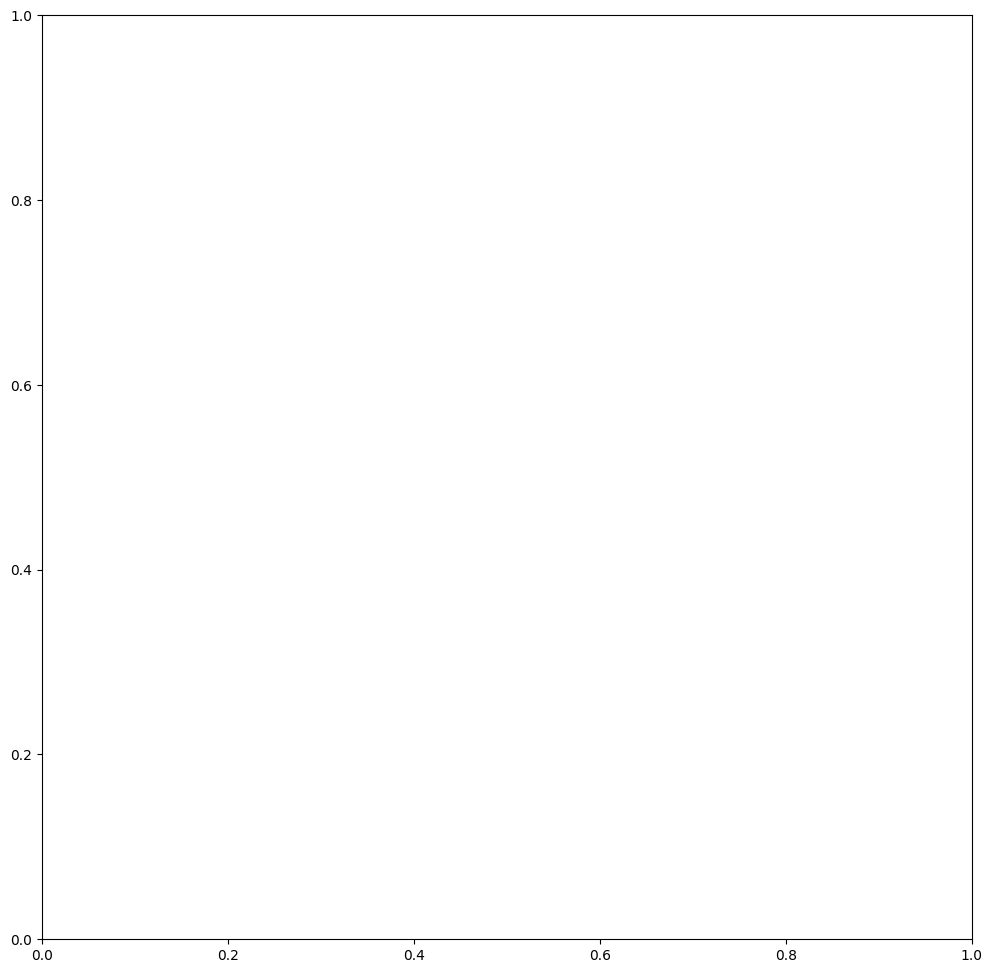

In [284]:
# Plot Overlay Map
fig, ax = plt.subplots(figsize=(12, 12))
df.plot(column='quartile', cmap='afmhot_r', ax=ax, edgecolor='black', legend=True)
# Show the map
plt.show()

quartile
Low              332
Moderate-Low     332
Moderate-High    332
High             332
Name: count, dtype: int64


/var/folders/wf/40wxtysd6lbgt6tgzmf4g5v80000gn/T/ipykernel_33923/2306297384.py:16: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  gdf.plot(column='quartile',


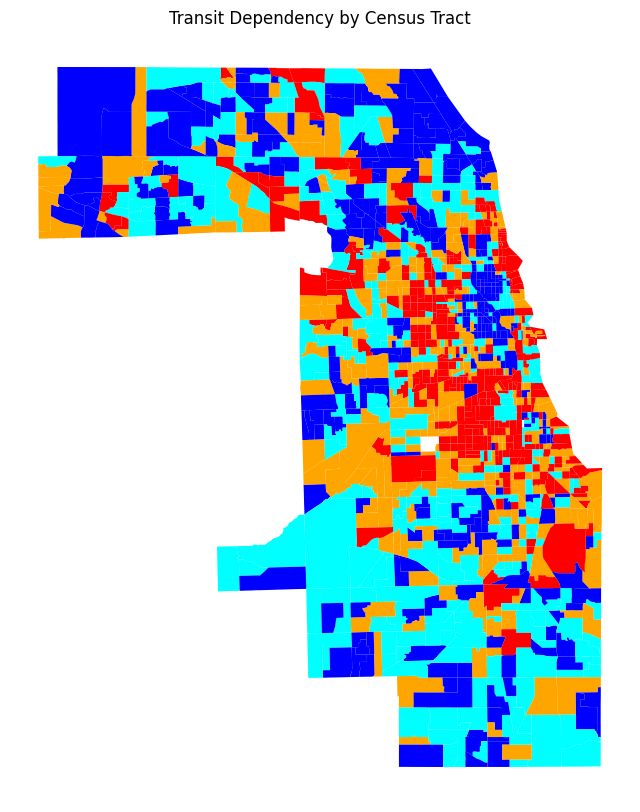

In [294]:
# Define the GeoDataFrame (you should replace this with your actual data loading code)
# Ensure 'quartile' column exists and contains the expected values
print(gdf['quartile'].value_counts())

# Define a color map for the quartiles
quartile_colors = {
    'Low': 'blue',
    'Moderate-Low': 'cyan',
    'Moderate-High': 'orange',
    'High': 'red'
}

# Plot the GeoDataFrame with the specified colors for quartiles
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

gdf.plot(column='quartile', 
         ax=ax, 
         legend=True,
         legend_kwds={'title': "Transit Dependency Quartiles"},
         color=[quartile_colors[q] for q in gdf['quartile']])

# Add a title and axes labels
ax.set_title('Transit Dependency by Census Tract')
ax.set_axis_off()

# Show the plot
plt.show()